Реализация линейной регрессии со всеми признаками

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

life = pd.read_csv("Life Expectancy Data.csv")
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [21]:
life.info(memory_usage='deep')
life['Life expectancy '].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   int64  
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   int64  
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

array([65. , 59.9, 59.5, 59.2, 58.8, 58.6, 58.1, 57.5, 57.3, 57. , 56.7,
       56.2, 55.3, 54.8, 77.8, 77.5, 77.2, 76.9, 76.6, 76.2, 76.1, 75.3,
       75.9, 74.2, 73.5, 73. , 72.8, 73.3, 73.6, 72.6, 75.4, 75.1, 74.9,
       74.7, 74.4, 74.1, 73.8, 73.4, 72.9, 72.3, 51.7, 51.1, 56. , 51. ,
       49.6, 49.1, 48.7, 48.2, 76. , 75.7, 75.5, 75.6, 74.8, 75.2, 74.6,
       73.9, 73.2, 72.7, 72. , 82.7, 82.5, 82.3, 82. , 81.9, 81.7, 81.3,
       81.2, 81. , 86. , 83. , 79.9, 81.4, 81.1, 88. , 84. , 79.8, 79.4,
       79.3, 78.8, 78.7, 78.6, 78.1, 72.5, 72.2, 71.9, 71.6, 71.1, 78. ,
       69.2, 68.4, 67.8, 71.4, 71. , 77. , 69.9, 69.5, 69.1, 68.6, 68.2,
       67.3, 66.8, 71.7, 70. , 69.8, 68.9, 68.1, 67.7, 67.2, 68. , 89. ,
       87. , 80. , 79.5, 78.9, 78.3, 77.6, 69.4, 69.6, 69. , 68.7, 68.5,
       68.3, 59.7, 59.3, 59.1, 58.7, 58.4, 57.6, 57.1, 56.8, 56.5, 56.1,
       55.8, 55.6, 67.9, 67.4, 67. , 66.5, 65.8, 64.2, 63.3, 62.5, 61.7,
       62. , 76.8, 76.4, 75. , 65.1, 63.4, 62.2, 61

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(life['Country']) 
life['Country'] = label_encoder.transform(life['Country'])  

In [5]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(life['Status']) 
life['Status'] = label_encoder.transform(life['Status'])  

In [22]:
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [23]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [24]:
x = life[['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']].values
y = life['Life expectancy '].values

In [25]:
features = pd.Series(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'])
features

0                             Country
1                                Year
2                              Status
3                    Life expectancy 
4                     Adult Mortality
5                       infant deaths
6                             Alcohol
7              percentage expenditure
8                         Hepatitis B
9                            Measles 
10                               BMI 
11                 under-five deaths 
12                              Polio
13                  Total expenditure
14                        Diphtheria 
15                           HIV/AIDS
16                                GDP
17                         Population
18               thinness  1-19 years
19                 thinness 5-9 years
20    Income composition of resources
21                          Schooling
dtype: object

In [26]:
life.dropna(axis=0, how="any")

# Создадим модель линейной регрессии
slr = LinearRegression()

# Применим линейную регрессию к нашему набору данных 
slr.fit(x, y)

# так как у нас много признаков, а не один как в предыдушем примере,
# то у нас будет много разных коэффицентов для каждого признака
# сохраним их все в датафрейм
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df

,Coefficient,features
0,9.741982e-16,Country
1,-1.841818e-13,Year
2,-4.000011e-14,Status
3,1.000000e+00,Life expectancy
4,1.971030e-15,Adult Mortality
5,1.563486e-14,infant deaths
6,5.370225e-15,Alcohol
7,-4.408578e-17,percentage expenditure
8,6.397927e-17,Hepatitis B
9,-1.321228e-16,Measles


In [27]:
slr.intercept_

3.6563108096743235e-10

Реализация линейной регрессии с одним признаком

In [30]:
life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [102]:
import matplotlib.pyplot as plt

x = life[['Adult Mortality']].values
y = life['Life expectancy '].values

slr = LinearRegression()
slr.fit(x, y)
y_pred = slr.predict(x)
print('Slope: ', slr.coef_)
print('Intercept:', slr.intercept_)

Slope:  [-0.04931736]
Intercept: 77.5982379277905


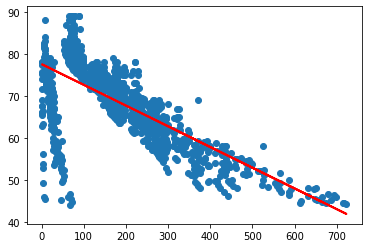

In [103]:
plt.scatter(x, y)
plt.plot(x, slr.predict(x), color='red', linewidth=2)

Считаем MSE

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 39.168
